In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv('cleaned_data.csv')

In [4]:
data.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [5]:
country_codes = pd.read_csv('noc_regions.csv')

In [6]:
country_codes.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
medals_per_country = data.pivot_table(index='NOC', values='Name', columns='Medal', aggfunc='count')

In [8]:
medals_per_country.head()

Medal,Bronze,Gold,None,Silver
NOC,,,,
AFG,2.0,NaN,124.0,NaN
AHO,NaN,NaN,78.0,1.0
ALB,NaN,NaN,70.0,NaN
ALG,8.0,5.0,534.0,4.0
AND,NaN,NaN,169.0,NaN


In [9]:
medals_per_country.fillna(0, inplace=True)

In [10]:
medals_per_country['Total Athletes'] = medals_per_country.sum(axis=1)
medals_per_country['Total Medals'] = medals_per_country['Bronze']+medals_per_country['Silver']+medals_per_country['Gold']

In [11]:
medals_per_country.head()

Medal,Bronze,Gold,None,Silver,Total Athletes,Total Medals
NOC,,,,,,
AFG,2.0,0.0,124.0,0.0,126.0,2.0
AHO,0.0,0.0,78.0,1.0,79.0,1.0
ALB,0.0,0.0,70.0,0.0,70.0,0.0
ALG,8.0,5.0,534.0,4.0,551.0,17.0
AND,0.0,0.0,169.0,0.0,169.0,0.0


In [12]:
medals_per_country_final = pd.merge(medals_per_country, country_codes, on='NOC')

In [13]:
medals_per_country_final.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region,notes
0,AFG,2.0,0.0,124.0,0.0,126.0,2.0,Afghanistan,NaN
1,AHO,0.0,0.0,78.0,1.0,79.0,1.0,Curacao,Netherlands Antilles
2,ALB,0.0,0.0,70.0,0.0,70.0,0.0,Albania,NaN
3,ALG,8.0,5.0,534.0,4.0,551.0,17.0,Algeria,NaN
4,AND,0.0,0.0,169.0,0.0,169.0,0.0,Andorra,NaN


In [14]:
to_drop = ['notes']
medals_per_country_final.drop(to_drop, axis=1, inplace=True)

In [15]:
medals_per_country_final.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
0,AFG,2.0,0.0,124.0,0.0,126.0,2.0,Afghanistan
1,AHO,0.0,0.0,78.0,1.0,79.0,1.0,Curacao
2,ALB,0.0,0.0,70.0,0.0,70.0,0.0,Albania
3,ALG,8.0,5.0,534.0,4.0,551.0,17.0,Algeria
4,AND,0.0,0.0,169.0,0.0,169.0,0.0,Andorra


In [16]:
medals_per_country_final.sort_values('Total Medals',ascending=False,inplace=True)
to_graph = medals_per_country_final.head(50)

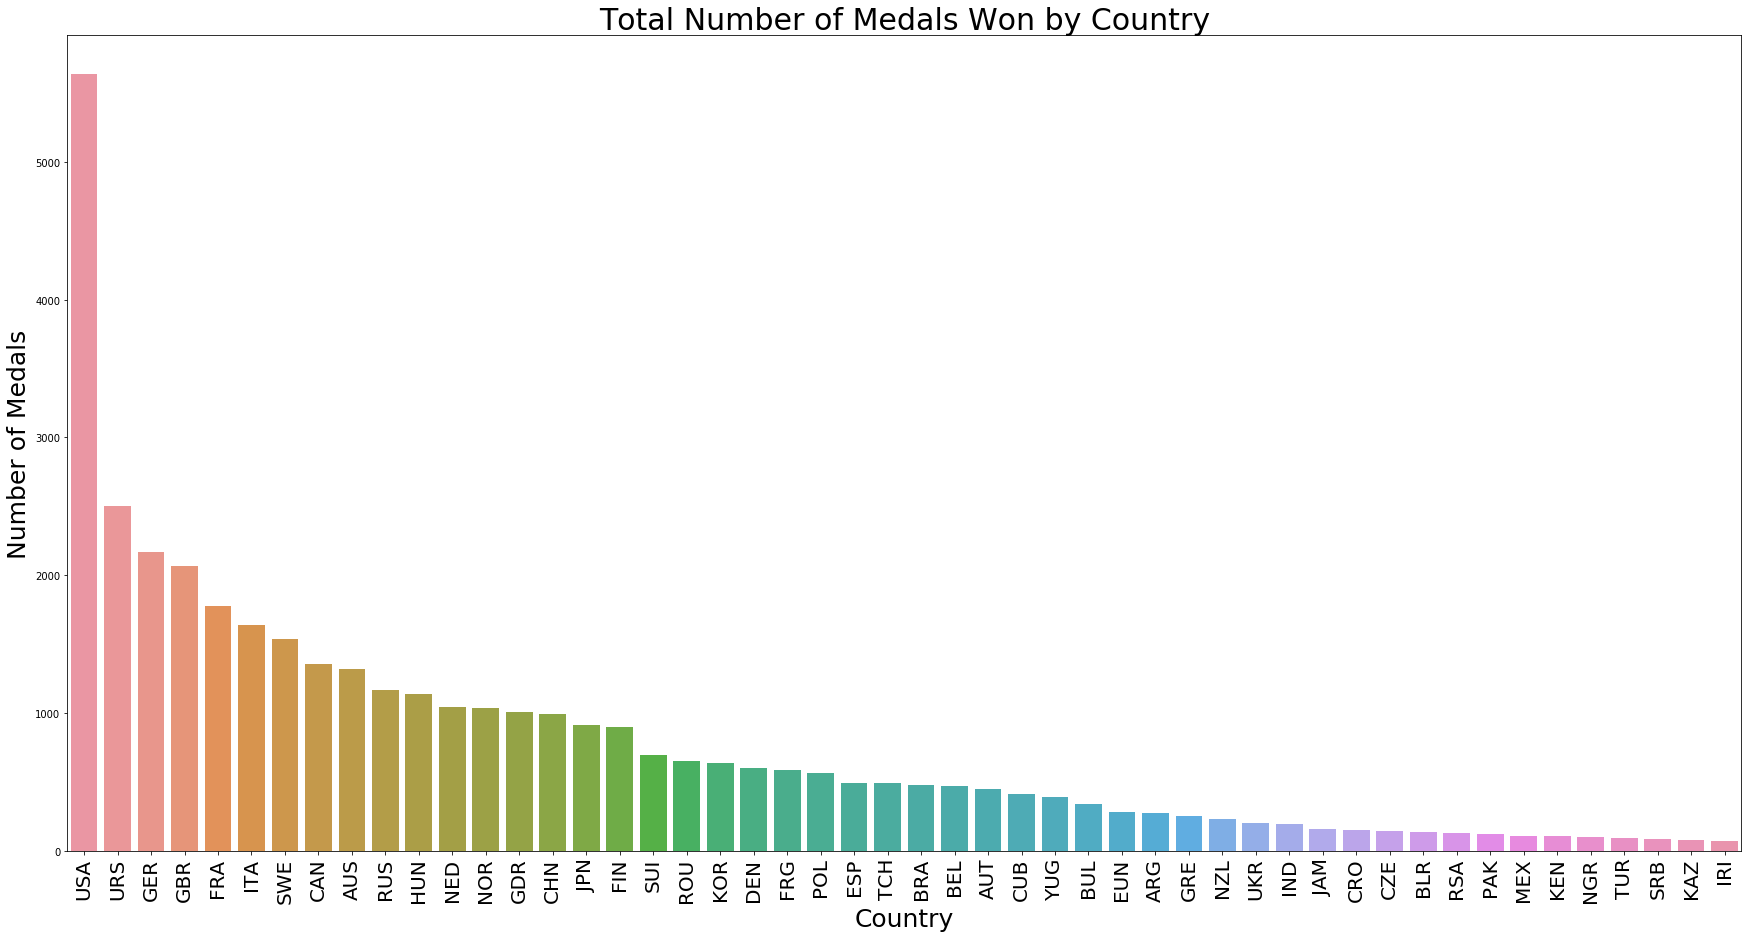

In [17]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph.head(50)['NOC'],to_graph.head(50)['Total Medals'],ci=False)
plt.xticks(rotation = 90,fontsize=20)
plt.title("Total Number of Medals Won by Country",fontsize=30)
plt.ylabel("Number of Medals",fontsize=25)
plt.xlabel("Country",fontsize=25)
plt.show()

In [18]:
total_olympians_per_country = data.NOC.value_counts()

In [19]:
total_olympians_per_country.head()

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: NOC, dtype: int64

In [20]:
propor_medals_per_country = medals_per_country_final.copy()

In [21]:
propor_medals_per_country.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
215,USA,1358.0,2638.0,13216.0,1641.0,18853.0,5637.0,USA
213,URS,689.0,1082.0,3182.0,732.0,5685.0,2503.0,Russia
79,GER,746.0,745.0,7665.0,674.0,9830.0,2165.0,Germany
74,GBR,651.0,678.0,10188.0,739.0,12256.0,2068.0,UK
69,FRA,666.0,501.0,10981.0,610.0,12758.0,1777.0,France


In [22]:
to_propor = ['Bronze','Gold','None','Silver','Total Medals']
for column in to_propor:
    propor_medals_per_country[column] = (100*(propor_medals_per_country[column]/propor_medals_per_country['Total Athletes'])).round(2)

In [23]:
propor_medals_per_country.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
215,USA,7.20,13.99,70.10,8.70,18853.0,29.90,USA
213,URS,12.12,19.03,55.97,12.88,5685.0,44.03,Russia
79,GER,7.59,7.58,77.98,6.86,9830.0,22.02,Germany
74,GBR,5.31,5.53,83.13,6.03,12256.0,16.87,UK
69,FRA,5.22,3.93,86.07,4.78,12758.0,13.93,France


In [24]:
propor_medals_per_country.drop(['Total Athletes'],axis=1,inplace=True)

In [25]:
propor_medals_per_country.head()

,NOC,Bronze,Gold,None,Silver,Total Medals,region
215,USA,7.20,13.99,70.10,8.70,29.90,USA
213,URS,12.12,19.03,55.97,12.88,44.03,Russia
79,GER,7.59,7.58,77.98,6.86,22.02,Germany
74,GBR,5.31,5.53,83.13,6.03,16.87,UK
69,FRA,5.22,3.93,86.07,4.78,13.93,France


In [26]:
propor_medals_per_country.sort_values('Total Medals',ascending=False,inplace=True)
to_graph = propor_medals_per_country.head(50)

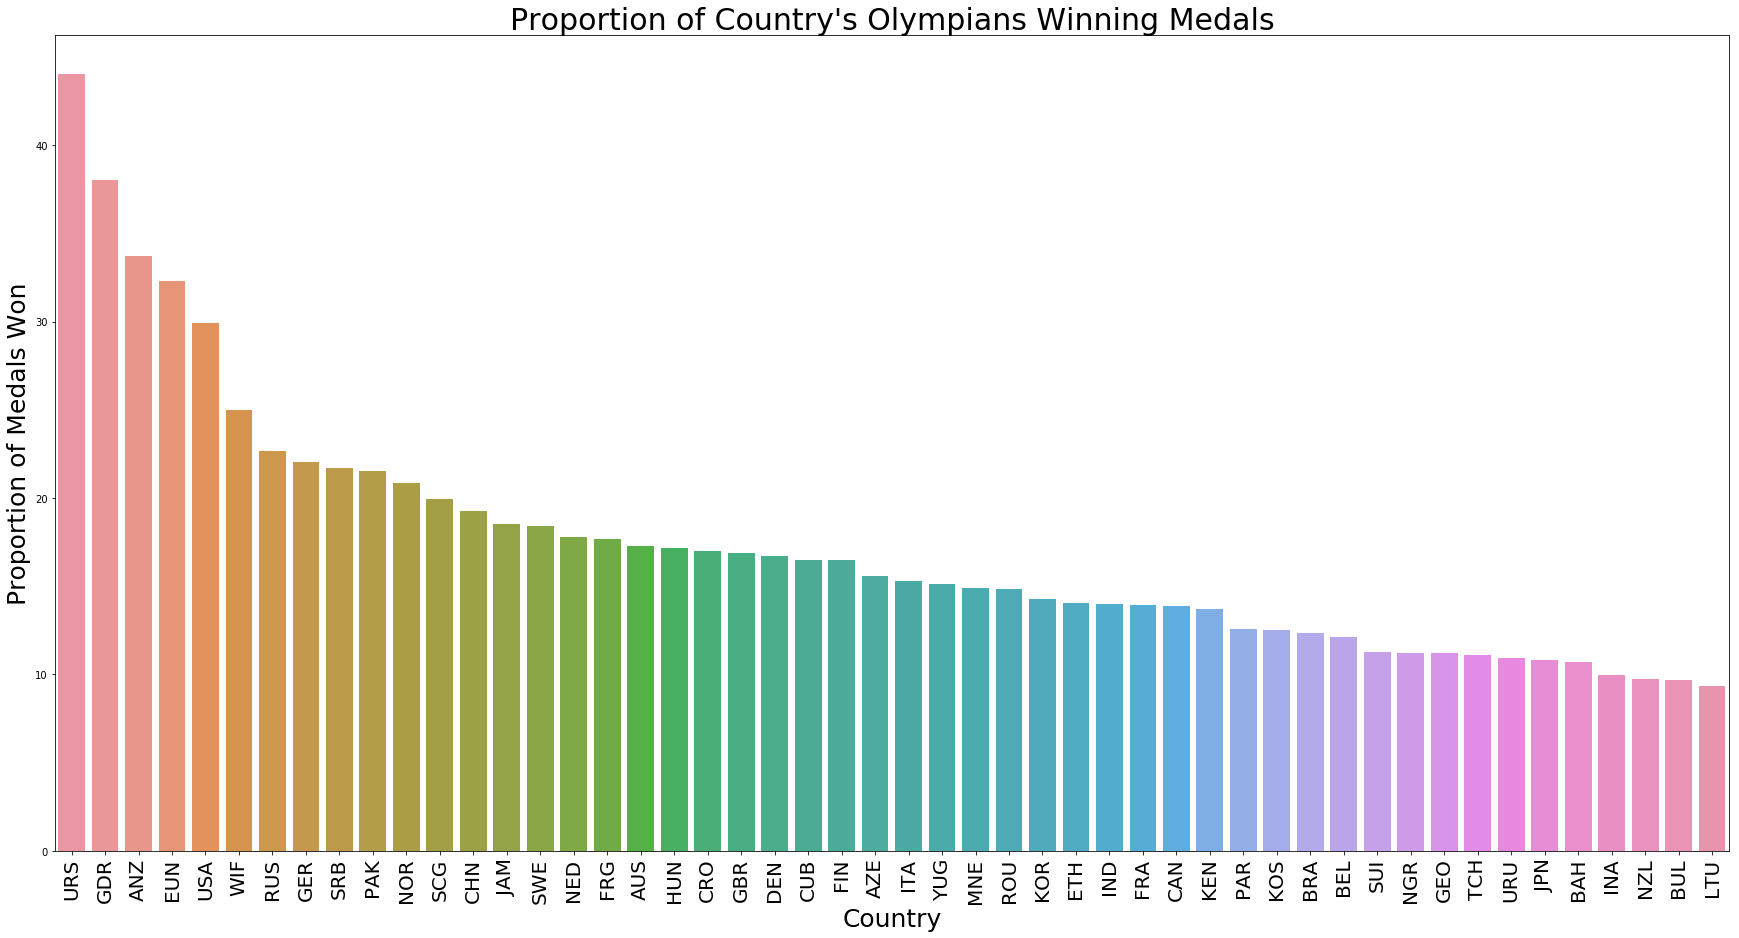

In [27]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph.head(50)['NOC'],to_graph.head(50)['Total Medals'],ci=False)
plt.xticks(rotation = 90,fontsize=20)
plt.title("Proportion of Country's Olympians Winning Medals",fontsize=30)
plt.ylabel("Proportion of Medals Won",fontsize=25)
plt.xlabel("Country",fontsize=25)
plt.show()

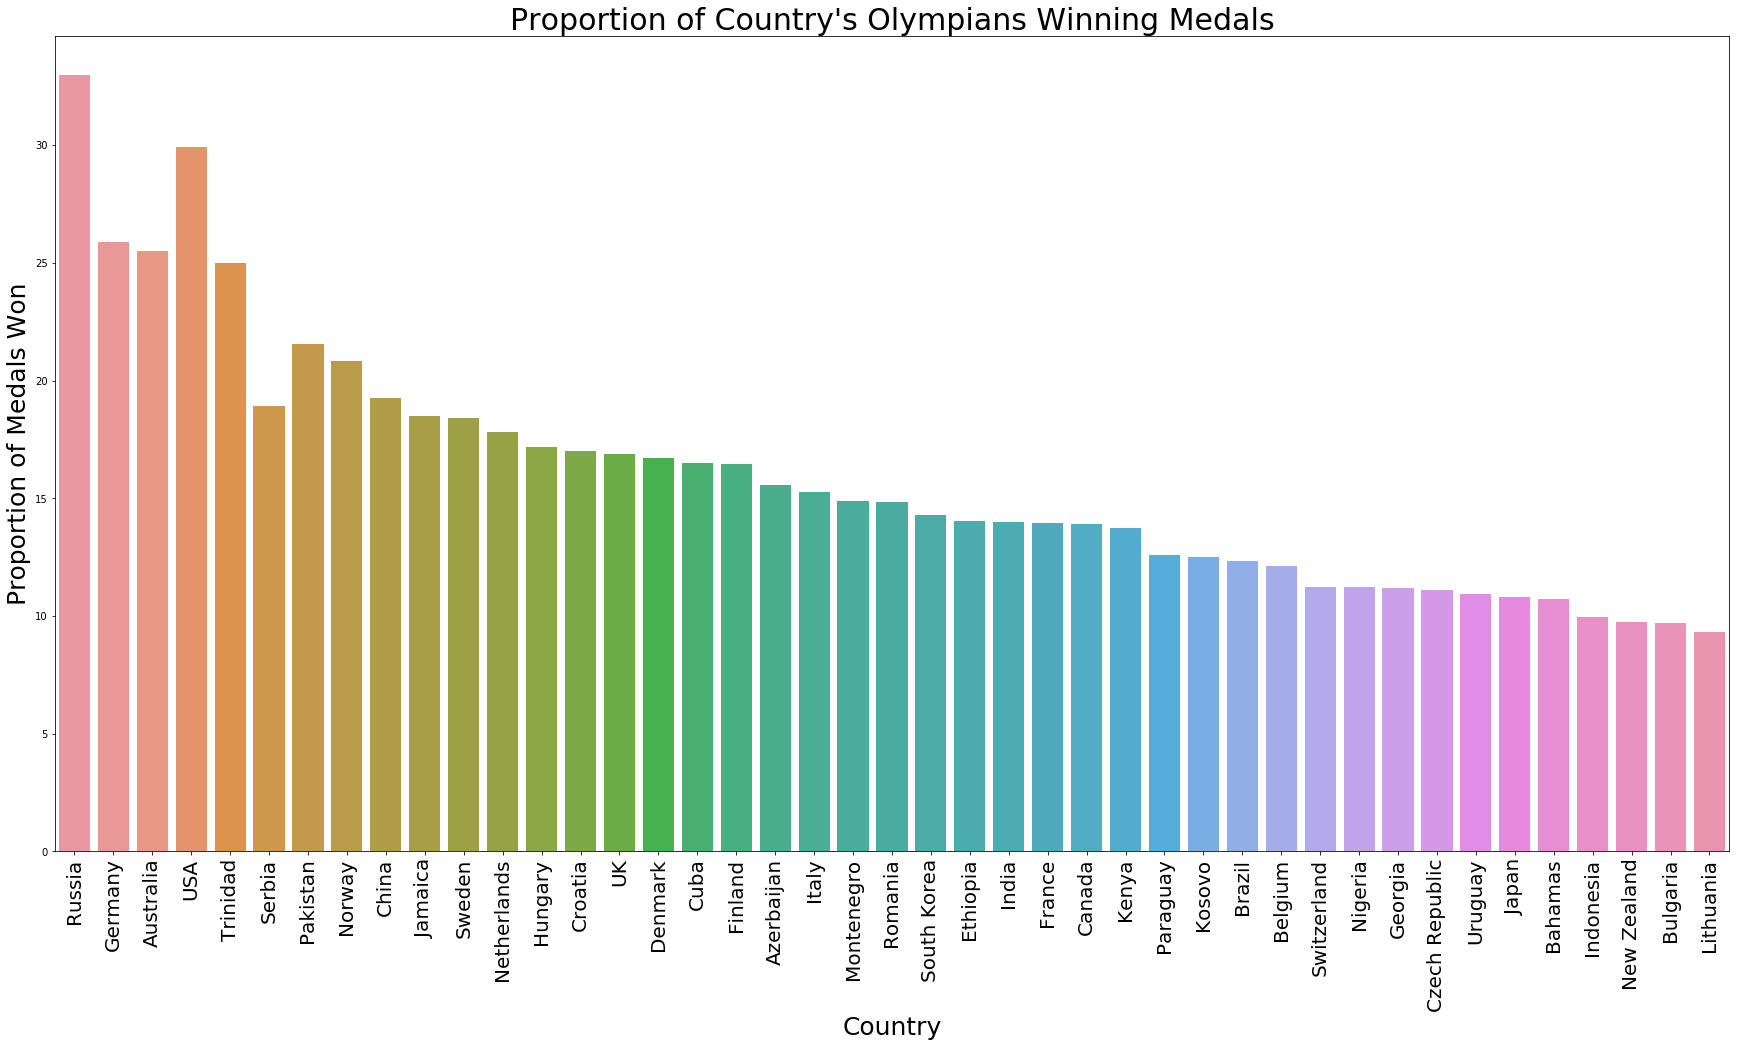

In [28]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph.head(50)['region'],to_graph.head(50)['Total Medals'],ci=False)
plt.xticks(rotation = 90,fontsize=20)
plt.title("Proportion of Country's Olympians Winning Medals",fontsize=30)
plt.ylabel("Proportion of Medals Won",fontsize=25)
plt.xlabel("Country",fontsize=25)
plt.show()

In [30]:
import geopandas as gpd
shapefile = 'map_data/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [31]:
print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


In [32]:
mapping_data = medals_per_country_final.copy()

In [33]:
mapping_data.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
215,USA,1358.0,2638.0,13216.0,1641.0,18853.0,5637.0,USA
213,URS,689.0,1082.0,3182.0,732.0,5685.0,2503.0,Russia
79,GER,746.0,745.0,7665.0,674.0,9830.0,2165.0,Germany
74,GBR,651.0,678.0,10188.0,739.0,12256.0,2068.0,UK
69,FRA,666.0,501.0,10981.0,610.0,12758.0,1777.0,France


In [37]:
mapping_data.sort_values('region',ascending=False,inplace=True)

In [49]:
mapping_data.set_index('NOC',inplace=True)

In [38]:
gdf.sort_values('country',ascending=False,inplace=True)

In [52]:
mapping_data[:15]

,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
NOC,,,,,,,
RHO,0.0,0.0,12.0,0.0,12.0,0.0,Zimbabwe
ZIM,1.0,17.0,289.0,4.0,311.0,22.0,Zimbabwe
ZAM,1.0,0.0,181.0,1.0,183.0,2.0,Zambia
YAR,0.0,0.0,11.0,0.0,11.0,0.0,Yemen
YMD,0.0,0.0,5.0,0.0,5.0,0.0,Yemen
YEM,0.0,0.0,32.0,0.0,32.0,0.0,Yemen
ISV,0.0,0.0,293.0,1.0,294.0,1.0,"Virgin Islands, US"
IVB,0.0,0.0,45.0,0.0,45.0,0.0,"Virgin Islands, British"
VIE,0.0,1.0,150.0,3.0,154.0,4.0,Vietnam


In [40]:
gdf[:10]

,country,country_code,geometry
73,eSwatini,SWZ,"POLYGON ((32.07167 -26.73382, 31.86806 -27.177..."
48,Zimbabwe,ZWE,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
70,Zambia,ZMB,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."
157,Yemen,YEM,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
94,Vietnam,VNM,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
40,Venezuela,VEN,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810..."
89,Vanuatu,VUT,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488..."
6,Uzbekistan,UZB,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
28,Uruguay,URY,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."


In [59]:
mapping_data[mapping_data.index=='RHO']

,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
NOC,,,,,,,
RHO,0.0,0.0,12.0,0.0,12.0,0.0,Zimbabwe


In [367]:
to_map = mapping_data[['Total Medals','region','NOC']]

In [368]:
merged = gdf.merge(to_map, left_on = 'country', right_on = 'region')

In [369]:
merged_2nd = gdf.merge(to_map, left_on = 'country_code', right_on = 'NOC')

In [348]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [ ]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

In [353]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest medal count.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 2505)

#Define custom tick labels for color bar.
tick_labels = {'0': '10', '10': '50', '50':'200', '200':'500', '500':'1000', '1000': '>1000'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Number of Medals Won by Country', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Total Medals', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

Loading BokehJS ...

In [355]:
mapping_data2 = propor_medals_per_country.copy()

In [356]:
to_map2 = mapping_data2[['Total Medals','region']]

In [357]:
merged2 = gdf.merge(to_map2, left_on = 'country', right_on = 'region')

In [360]:
import json
#Read data to json.
merged_json = json.loads(merged2.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [364]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest medal count.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 35)

#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = "Proportion of Country's Athletes Winning Medals", plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Total Medals', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure.
show(p)